# Applied Mathematics 115: Mathematical Modeling  
---
*2024 Spring / Full Term*

**Meeting Time:**  
Tuesday 10:30 AM - 11:45 AM  
Thursday 10:30 AM - 11:45 AM
<br>
<br>

**Instructors:**  
*Michael P. Brenner* (Pierce Hall 313) brenner@seas.harvard.edu  
Francesco Mottes fmottes@seas.harvard.edu  

**Teaching Fellows:**  
Henry Bae henrybae@college.harvard.edu  
Sarah Martinson sarahmartinson@g.harvard.edu  
Shruti Sharma ssharma1@g.harvard.edu  
Al Shodiev alshodiev@college.harvard.edu  
Alex Sullivan alexsullivan@college.harvard.edu  
Matt Tibbitts mtibbitts@college.harvard.edu  





# Lecture 5: Extreme Value Statistics


## Outline

1. Explaining the basic ideas behind extreme value statistics.
2. Drawing a set of random values from a Gaussian and empirically constructing the extreme value distribution of those draws.
3. Introducing the Gumbel probabiity distribution and comparing it with the synthetic data distribution from (2).
4. Loading datasets of racing times and hourly rain data, building a histogram of the extreme value distribution and discussing whether the theory from (3) applies.


## Introduction to Extreme Value Statistics

Extreme value statistics describe extreme events or values in a dataset, where "extreme values" refer to observations significantly larger or smaller than the majority of the data—indicating extreme deviations from the central tendency. While these events are generally rare, understanding them is crucial due to their potential significant impacts on interpretations and results. The objective of this analysis is to estimate the probability of such extreme events, such as predicting a 100-year flood, assessing the likelihood of drug side effects, or evaluating exceptionally high athletic performances.

Let $X_1, ... , X_n$ be $n$ IID random variables drawn from a probability distribution $p(x)$ with cumulative distribution $C(x)$. We aim to examine the behavior of the maximum $M_n$ of this sample, where $M_n = \max \{X_1, ... , X_n \}.$

The exact distribution of the maximum is given by

$$ P(M_n \leq z) = P(X_1 \leq z, ... , X_n \leq z) = P(X_1 \leq z) \times ... \times P(X_n \leq z) = (C(z))^n. $$

**Note:** For minimal extremes instead of maxima, use $p(-x)$ instead of $p(x)$ to obtain a similar result.

Due to this relationship, it is sensible to utilize the cumulative distribution $C(x)$ when dealing with extreme values. In practice, the distribution $C$ may be unknown, but an asymptotic result can be used.

In [ ]:
# imports
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

from tqdm import tqdm

# set random seed for reproducibility
# —> if you comment this line out, you will get different results each time you run the code
np.random.seed(42)

# Gaussian Sampling EVD

Let's start with a numerical investigation. We sample from a gaussian distribution $n$ times, then we record the maximum value. We carry out this procedure $N$ of times, then we build the distribution of the observed maximal values.

In [ ]:
n = 1000 # number of draws per trial
N = 10000 # number of trials


# n samples from gaussian, returns the max value
def top_gaussian(n, mu=0, sigma=1):
    return np.random.normal(mu,sigma,n).max()

# take max-of-n value for N times
gauss_extremes = np.array([top_gaussian(n) for _ in range(N)])

print(f'Avg. max value:\t\t{gauss_extremes.mean()}')
print(f'Standard deviation:\t{gauss_extremes.std()}')

Avg. max value:		3.243306003876342
Standard deviation:	0.35317361406226694


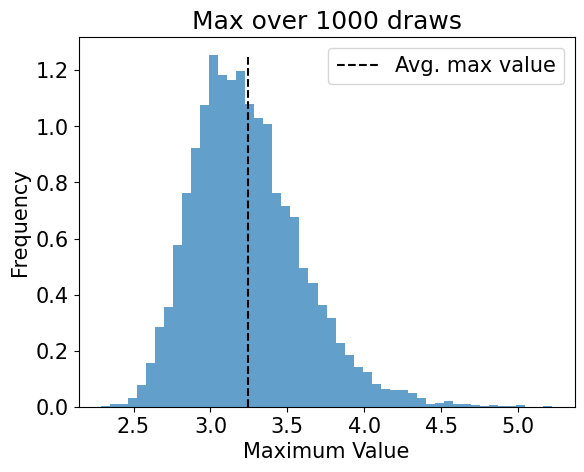

In [ ]:
hist = plt.hist(gauss_extremes, bins=50, density=True, alpha=.7)

plt.vlines(gauss_extremes.mean(), 0, hist[0].max(), colors='k', linestyles='--', label='Avg. max value')

plt.xlabel('Maximum Value')
plt.ylabel('Frequency')
plt.title(f'Max over {n} draws')
plt.legend()
plt.show();

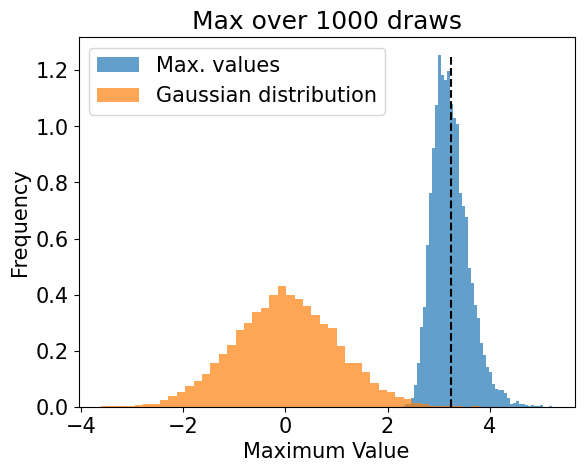

In [ ]:
hist = plt.hist(gauss_extremes, bins=50, density=True, alpha=.7, label='Max. values')

plt.hist(np.random.normal(size=N), bins=50, density=True, alpha=.7, label='Gaussian distribution')

plt.vlines(gauss_extremes.mean(), 0, hist[0].max(), colors='k', linestyles='--')

plt.xlabel('Maximum Value')
plt.ylabel('Frequency')
plt.title(f'Max over {n} draws')
plt.legend()
plt.show();

## Scaling of average and standard deviation

While we assume that $N$ is always big enough to approximate the true distribution of data, we expect that the more draws we have for each trial (that is, the higher $n$) the higher the probability of observing extreme events.

We can investigate how the properties of the distribution change with $n$.

In [ ]:
N = 1000

ns=(10**np.linspace(1,6,10)).astype(int) #sample sizes

mean_n = []
std_n = []
for n in tqdm(ns):

    extr_vals = np.array([top_gaussian(n) for _ in range(N)])

    mean_n += [extr_vals.mean()]
    std_n += [extr_vals.std()]

100%|██████████| 10/10 [00:49<00:00,  4.93s/it]


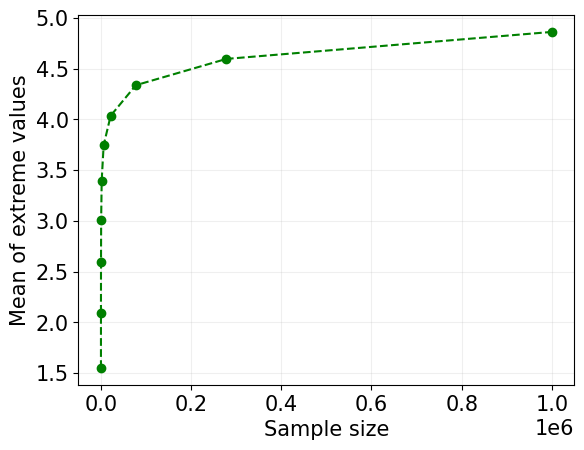

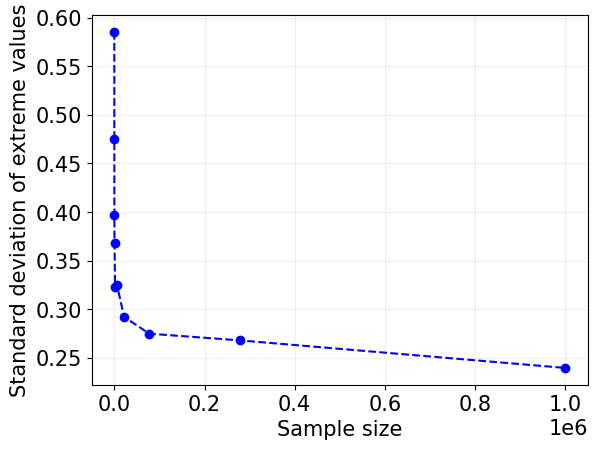

In [ ]:
plt.plot(ns, mean_n, 'go--')
plt.xlabel('Sample size')
plt.ylabel('Mean of extreme values')
plt.grid(alpha=.2)
plt.show()

plt.plot(ns, std_n, 'bo--')
plt.xlabel('Sample size')
plt.ylabel('Standard deviation of extreme values')
plt.grid(alpha=.2)
plt.show()


The scaling is better observed using a logarithmic x-scale.

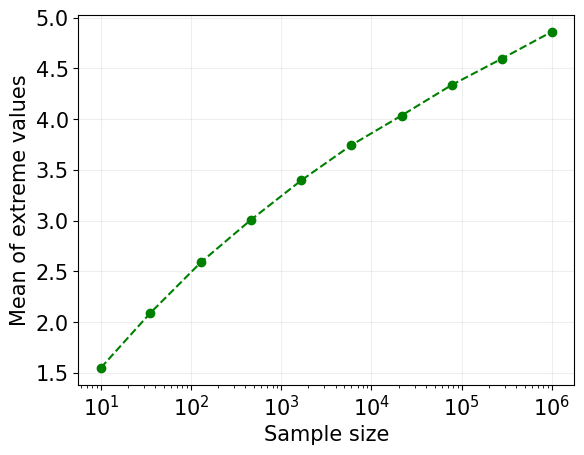

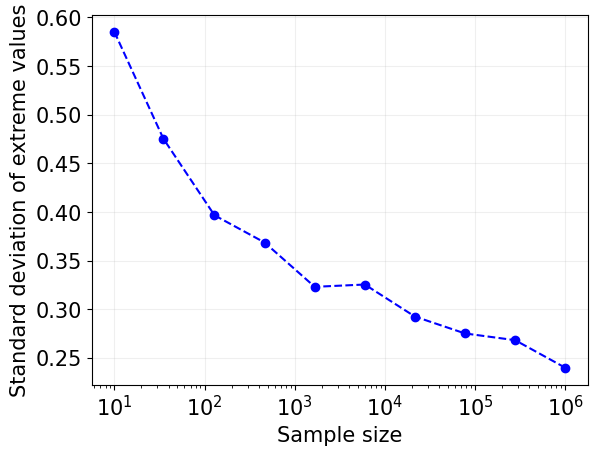

In [ ]:
# prompt: plot scatterplot of means and another scatterplot of stds

plt.plot(ns, mean_n, 'go--')
plt.xscale('log')

plt.xlabel('Sample size')
plt.ylabel('Mean of extreme values')
plt.grid(alpha=.2)
plt.show()



plt.plot(ns, std_n, 'bo--')
plt.xscale('log')

plt.xlabel('Sample size')
plt.ylabel('Standard deviation of extreme values')
plt.grid(alpha=.2)
plt.show()


# Exponential Sampling EVD

Let's try a different base distribution. We now sample from an exponential distribution.

In [ ]:
n = 1000 #number of draws per trial
N = 10000 #nuber of trials


# n samples from gaussian, returns the max value
def top_exponential(n, lmbd=1):
    return np.random.exponential(lmbd,n).max()

# take max-of-n value for N times
exp_extremes = np.array([top_exponential(n) for _ in range(N)])

print(f'Avg. max value:\t\t{exp_extremes.mean()}')
print(f'Standard deviation:\t{exp_extremes.std()}')

Avg. max value:		7.5024984064851346
Standard deviation:	1.291030132435648


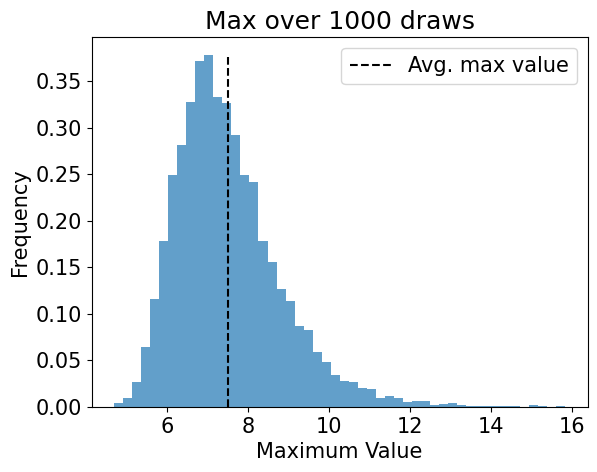

In [ ]:
hist = plt.hist(exp_extremes, bins=50, density=True, alpha=.7)

plt.vlines(exp_extremes.mean(), 0, hist[0].max(), colors='k', linestyles='--', label='Avg. max value')

plt.xlabel('Maximum Value')
plt.ylabel('Frequency')
plt.title(f'Max over {n} draws')
plt.legend()
plt.show();

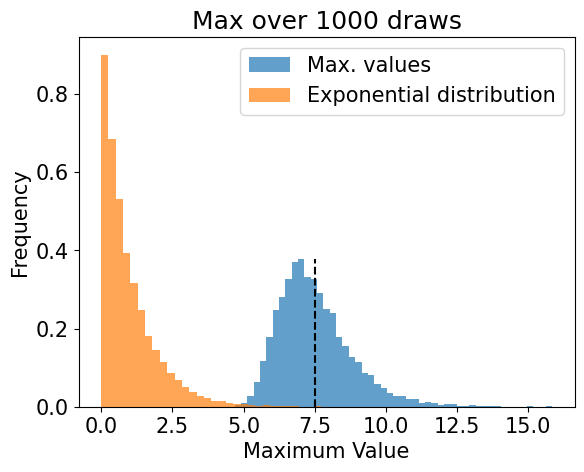

In [ ]:
hist = plt.hist(exp_extremes, bins=50, density=True, alpha=.7, label='Max. values')

plt.hist(np.random.exponential(size=N), bins=50, density=True, alpha=.7, label='Exponential distribution')

plt.vlines(exp_extremes.mean(), 0, hist[0].max(), colors='k', linestyles='--')

plt.xlabel('Maximum Value')
plt.ylabel('Frequency')
plt.title(f'Max over {n} draws')
plt.legend()
plt.show();

## Scaling of average and standard deviation

In [ ]:
N = 1000

ns=(10**np.linspace(1,6,10)).astype(int) #sample sizes

mean_n = []
std_n = []
for n in tqdm(ns):

    extr_vals = np.array([top_exponential(n) for _ in range(N)])

    mean_n += [extr_vals.mean()]
    std_n += [extr_vals.std()]

100%|██████████| 10/10 [00:34<00:00,  3.47s/it]


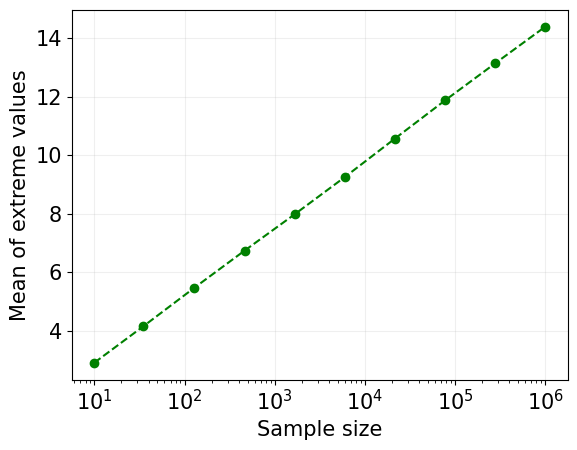

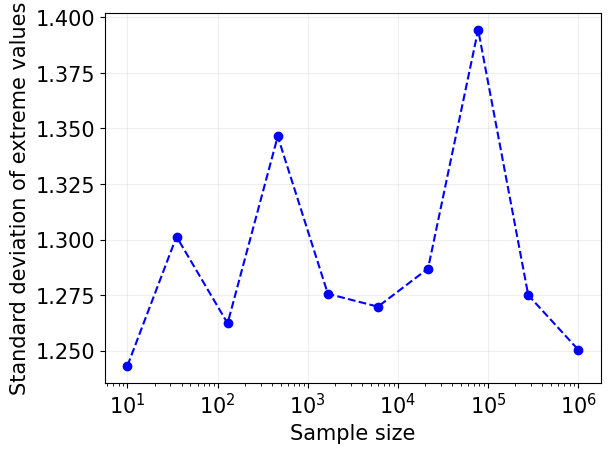

In [ ]:
# prompt: plot scatterplot of means and another scatterplot of stds

plt.plot(ns, mean_n, 'go--')
plt.xscale('log')

plt.xlabel('Sample size')
plt.ylabel('Mean of extreme values')
plt.grid(alpha=.2)
plt.show()



plt.plot(ns, std_n, 'bo--')
plt.xscale('log')

plt.xlabel('Sample size')
plt.ylabel('Standard deviation of extreme values')
plt.grid(alpha=.2)
plt.show()


# Universality

The shapes of the EVD obtained for the two different data distributions, exponential and gaussian, seem suspiciously similar. Let's try and see how much.

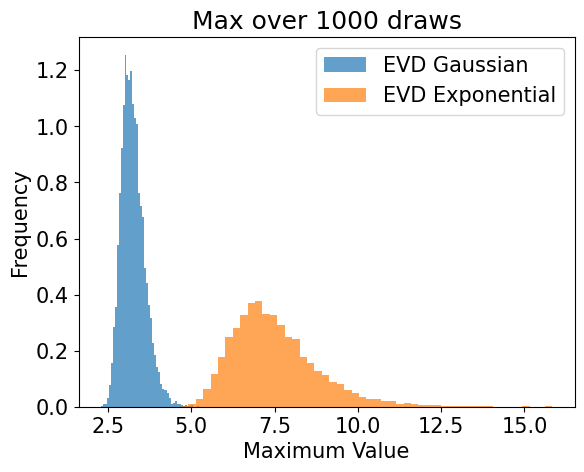

In [ ]:
plt.hist(gauss_extremes, bins=50, density=True, alpha=.7, label='EVD Gaussian')

plt.hist(exp_extremes, bins=50, density=True, alpha=.7, label='EVD Exponential')

plt.xlabel('Maximum Value')
plt.ylabel('Frequency')
plt.title(f'Max over {n} draws')
plt.legend();

There are obvious diffrences given by the fact that we are sampling from completely different processes. Let's what happens if we rescale both results so that their numerical values are comparable.

One way of doing this is to calculate the so-called **Z-scores** of the data, that is subtracting the mean and dividing by the standard deviation.

In [ ]:
z_gauss = (gauss_extremes - gauss_extremes.mean())/gauss_extremes.std()

z_exp = (exp_extremes - exp_extremes.mean())/exp_extremes.std()

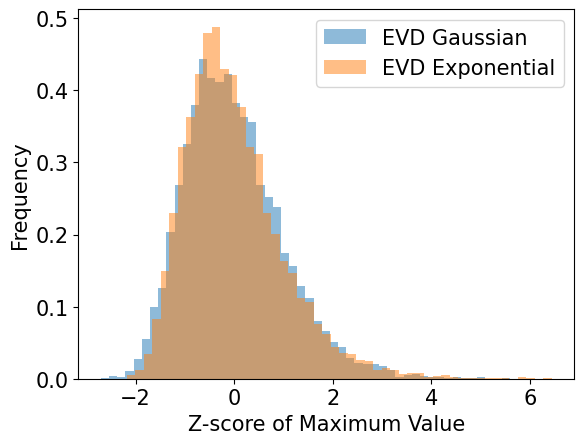

In [ ]:
plt.hist(z_gauss, bins=50, density=True, alpha=.5, label='EVD Gaussian')

plt.hist(z_exp, bins=50, density=True, alpha=.5, label='EVD Exponential')

plt.xlabel('Z-score of Maximum Value')
plt.ylabel('Frequency')
plt.legend();

They collapse onto one single shape for the EVD (we'll see in next section that we also know how to calculate this shape)!!!

In this case different underlying processes yield equal coarse-grained statistics (like the shape of the EVD), so we can derive a high-level theory without accounting for the precise details of the system we're modelling. This phenomenon happens surprisingly often and is widely know in (statistical) physics under the name of **universality**.

# The Gumbel Distribution

The **Gumbel distribution** is commonly employed to model the distribution of maxima (or minima) in a set of independent and identically distributed random variables (IIDs). In general, the Gumbel distribution arises when considering the maximum of $n$ variables drawn from *any* distribution $p(x)$ with a tail that decays sufficiently quickly (typically exponential or faster) as $n$ becomes large.




The probability density function (p.d.f.) is given by

$$ f(x;a,b) = \frac{1}{b} \exp \left( -\frac{x - a}{b} - \exp \left( - \frac{x - a}{b} \right) \right) $$

Here, $x$ represents the extreme value, $b$ is the scale parameter controlling spread, and $a$ is the location parameter determining the mode's position.



Various types of extreme value distributions exist, each suitable for specific settings with distinct characteristics. This discussion will focus on the Gumbel distribution, especially in cases where the distribution $M_n$ exhibits an exponentially diminishing tail. [Note that a standard Gaussian would be considered to have a "thin" tail as the pdf scales as $e^{-x^2}$, faster than a simple exponential.]

**Let's compare the outcomes of the Gumbel formula to the empirically calculated extreme value distribution above.** We will automatically estimate fitting parameters using the built-in SciPy function `gumbel_r`.

In [ ]:
from scipy.stats import gumbel_r

def fit_gumbel_distribution(data):
    """Fits Gumbel distribution to input data"""
    params = gumbel_r.fit(data)
    return gumbel_r(*params)

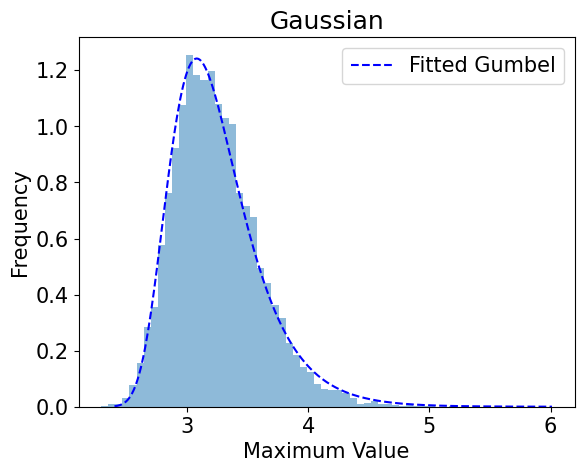

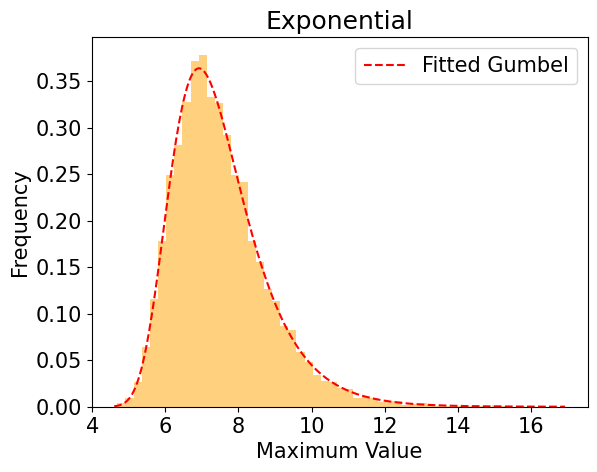

In [ ]:
### Fit a Gumbel distribution to the Gaussian extreme values
gauss_gumbel = fit_gumbel_distribution(gauss_extremes)

# Plot the fitted Gumbel distribution and the data
x_plot = np.linspace(*gauss_gumbel.interval(0.9999), 300)

plt.hist(gauss_extremes, bins=50, density=True, alpha=.5)
plt.plot(x_plot, gauss_gumbel.pdf(x_plot), 'b--', label='Fitted Gumbel')

plt.xlabel('Maximum Value')
plt.ylabel('Frequency')
plt.title('Gaussian')
plt.legend()
plt.show()

### Fit a Gumbel distribution to the Exponential extreme values
exp_gumbel = fit_gumbel_distribution(exp_extremes)

# Plot the fitted Gumbel distribution and the data
x_plot = np.linspace(*exp_gumbel.interval(0.9999), 300)

plt.hist(exp_extremes, bins=50, density=True, color='orange', alpha=.5)
plt.plot(x_plot, exp_gumbel.pdf(x_plot), 'r--', label='Fitted Gumbel')

plt.xlabel('Maximum Value')
plt.ylabel('Frequency')
plt.title('Exponential')
plt.legend()
plt.show()


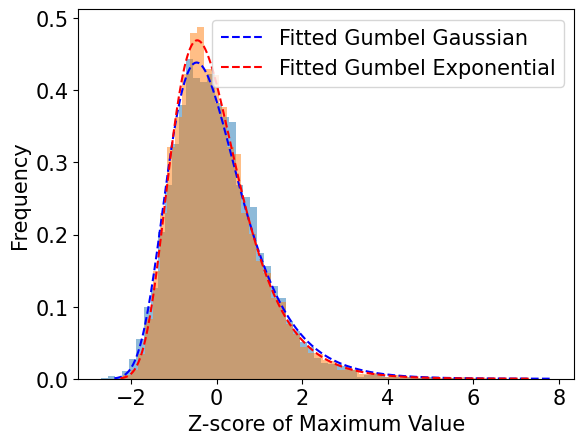

In [ ]:
### Fit a Gumbel distribution to the Gaussian extreme values
gauss_gumbel = fit_gumbel_distribution(z_gauss)

# Plot the fitted Gumbel distribution and the data
x_plot = np.linspace(*gauss_gumbel.interval(0.9999), 300)

plt.hist(z_gauss, bins=50, density=True, alpha=.5)
plt.plot(x_plot, gauss_gumbel.pdf(x_plot), 'b--', label='Fitted Gumbel Gaussian')


### Fit a Gumbel distribution to the Exponential extreme values
exp_gumbel = fit_gumbel_distribution(z_exp)

# Plot the fitted Gumbel distribution and the data
x_plot = np.linspace(*exp_gumbel.interval(0.9999), 300)

plt.hist(z_exp, bins=50, density=True, alpha=.5)
plt.plot(x_plot, exp_gumbel.pdf(x_plot), 'r--', label='Fitted Gumbel Exponential')



plt.xlabel('Z-score of Maximum Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# (Stub) EVD for different base distributions

Observe what happens to the extreme value distribution when you change the underlying distribution $p(x)$. Copy the code from the first section and change the distribution and its parameters. Is the Gumbel distribution always valid?

In particular try to change the distribution you sample from with a power-law distribution. `scipy.stats.pareto` is a good choice, any $b$ parameter would work but choosing $b>4$ will make it easier to visualize the resulting EVD. Does the Gumbel distribution still explain the data in satisfactory way?

# Extreme events in real-world data

In [ ]:
import pandas as pd

In [ ]:
!git clone https://github.com/fmottes/Harvard-AM115-2024.git

DATA_PATH = 'Harvard-AM115-2024/Data/'

Cloning into 'Harvard-AM115-2024'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 63 (delta 20), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (63/63), 2.33 MiB | 8.39 MiB/s, done.
Resolving deltas: 100% (20/20), done.


## Ultra Marathon (50km) Racing Times

The complete data come from the [Kaggle UltraMarathon Dataset](https://www.kaggle.com/datasets/aiaiaidavid/the-big-dataset-of-ultra-marathon-running). To simplify the notebook and limit the size of the dataset, we provide a preprocessed version ready to be analyzed.

The code below can be used to reproduce the simplified dataset from the original Kaggle dataset.

**Note:** We could make the following analysis more accutate by stratifying the data, for example splitting M/F runners and grouping by age categories.

In [ ]:
### THE FOLLOWING CODE REPRODUCES THE PROVIDED DATASET FROM THE ORIGINAL KAGGLE DATASET

# Filter out rows with 'km' in 'Athlete performance' column
# valid_entries = racing_data['Athlete performance'].str.contains(':') & racing_data['Athlete performance'].notna() & (racing_data['Event distance/length'] == '50km')
# racing_data = racing_data.loc[valid_entries, :].copy()

# # Convert 'Athlete performance' to seconds
# racing_data.loc[:, 'Athlete performance'] = pd.to_timedelta(racing_data['Athlete performance']).dt.total_seconds()

# racing_data = racing_data.loc[racing_data.groupby(['Event name','Event dates'])['Athlete performance'].idxmin()]

In [ ]:
# read in the racing data
with open(DATA_PATH+'L05-Winners_UltraMarathon_50km.csv', 'r') as fh:
    um_winners = pd.read_csv(fh)

um_winners.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2021,21.03.2021,+BAC 50km Ultra Pelso Race (HUN),50km,3,13675.0,*Várpalota,HUN,1999.0,M,MU23,13.163,699459
1,2020,03.10.2020,1. Breckerfelder Flower Power Ultra 50 (GER),50km,13,22020.0,*Castrop-Rauxel,GER,1982.0,F,W35,8.174,21477
2,2022,26.02.2022,1. HaWei50 - 50 km Ultralauf rund um den Hardt...,50km,205,11060.0,LC Rehlingen,GER,1992.0,M,M30,16.275,949773
3,2020,11.10.2020,1. Holter-Wald-Ultra (GER),50km,21,13548.0,TRI-Sport-Team TV Verl,GER,1988.0,M,M30,13.286,858098
4,2021,22.08.2021,1. RUHM-Rosengarten Ultra Heide Marathon (GER),50km,53,14353.0,Padjelanta Trailrunning,GER,1985.0,M,M35,12.541,335448


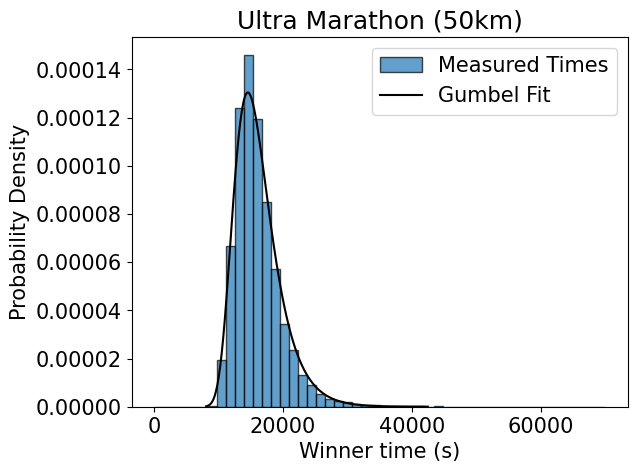

In [ ]:
# Fit Gumbel distribution to the winning times (in seconds)
gumbel_fit = fit_gumbel_distribution(um_winners['Athlete performance'])


# Plot the hist of the running times
plt.hist(um_winners['Athlete performance'],
         bins=50,
         edgecolor='black',
         density=True,
         label="Measured Times", alpha=.7
         )


# Plot the fitted Gumbel distribution
x_gumbel = np.linspace(*gumbel_fit.interval(0.9999), 300)
plt.plot(x_gumbel, gumbel_fit.pdf(x_gumbel), 'k', label='Gumbel Fit')


plt.xlabel('Winner time (s)')
plt.ylabel('Probability Density')
plt.title('Ultra Marathon (50km)')

plt.legend();

## JFK Hourly Rainfall History

We now look at ho the theory can be applied to the hourly rainfall rates at the JFK airport from 1949 to the present.

In [ ]:
with open(DATA_PATH+'L05-JFK_hourly_rainfall.csv', 'r') as fh:
    rainfall_data = pd.read_csv(fh)

In [ ]:
#Preprocess data

rainfall_data['DATE'] = pd.to_datetime(rainfall_data['DATE'])

# Extract the year and month and create new columns 'year' and 'month'
rainfall_data['year'] = rainfall_data['DATE'].dt.year
rainfall_data['month'] = rainfall_data['DATE'].dt.month

#get montly max of hourly rainfall
rain_month_max = rainfall_data.loc[rainfall_data.groupby(['year','month'])['hourly_rainfall'].idxmax()]

In [ ]:
from scipy.stats import genextreme #generalized evd

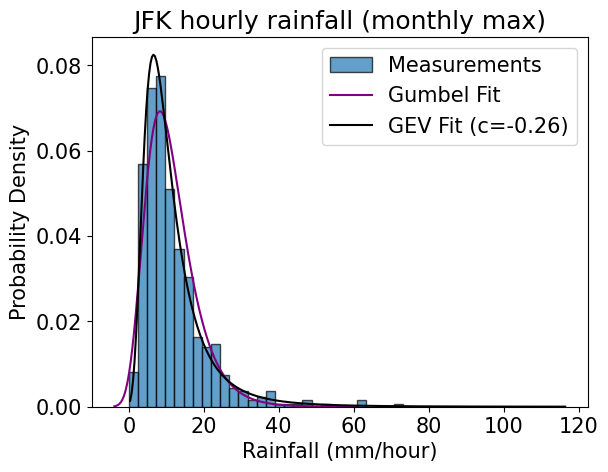

In [ ]:
# Plot the hist of data
plt.hist(rain_month_max['hourly_rainfall'],
         bins=30,
         edgecolor='black',
         density=True,
         label='Measurements', alpha=.7
         )


# Fit and plot Gumbel distribution to data
gumbel_fit = fit_gumbel_distribution(rain_month_max['hourly_rainfall'])

x_gumbel = np.linspace(*gumbel_fit.interval(0.9999), 300)
plt.plot(x_gumbel, gumbel_fit.pdf(x_gumbel), 'purple', label='Gumbel Fit')


# Fit and plot GEV distribution to data
gev_params = genextreme.fit(rain_month_max['hourly_rainfall'])
gev_fit = genextreme(*gev_params)

x_gev = np.linspace(*gev_fit.interval(0.999), 300)
plt.plot(x_gev, gev_fit.pdf(x_gev), 'k', label=f'GEV Fit (c={gev_params[0]:.2})')




plt.xlabel('Rainfall (mm/hour)')
plt.ylabel('Probability Density')
plt.title('JFK hourly rainfall (monthly max)')

plt.legend();

It seems that Gumbel description is reasomably accurate, but a fit to a general extreme value distribution yields a shape parameter $c < 0$. This indicates that the distribution shape is closer to a Frechèt distribution, which is usually employed to describe maxima coming from sampling a power-law distribution.

We can validate this hypothesis by looking at the overall distribution of the hourly rates (and not the monthly maxima). We observe indeed a distribution with a very slow decay (a straight line in a log-log plot).

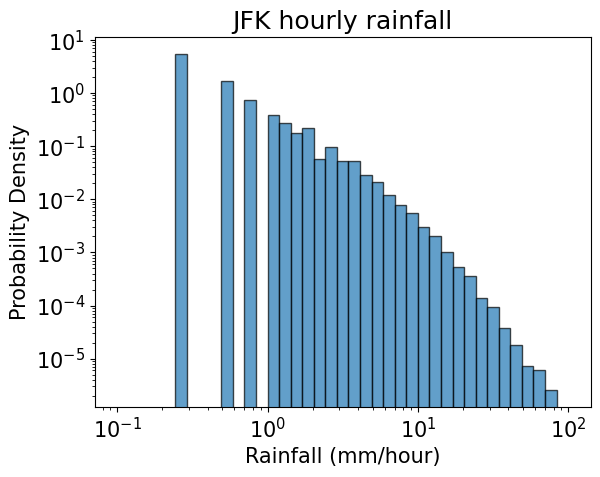

In [ ]:

# Plot the hist of the running times
plt.hist(rainfall_data['hourly_rainfall'],
         bins=np.logspace(-1,2,40),
         edgecolor='black',
         density=True,
         label="Measured Times", alpha=.7
         )


plt.xscale('log')
plt.yscale('log')

plt.xlabel('Rainfall (mm/hour)')
plt.ylabel('Probability Density')
plt.title('JFK hourly rainfall');

## Hammer Throw Winning Distances

Below we use data from [alltime-athletics](http://www.alltime-athletics.com/mhammok.htm) to analyze the statistic of winning hammer throw distances.

Can you think of any reason why this time our theory does not apply?

In [ ]:
with open(DATA_PATH+'L05-HammerThrow.csv', 'r') as fh:
    ht_data = pd.read_csv(fh)

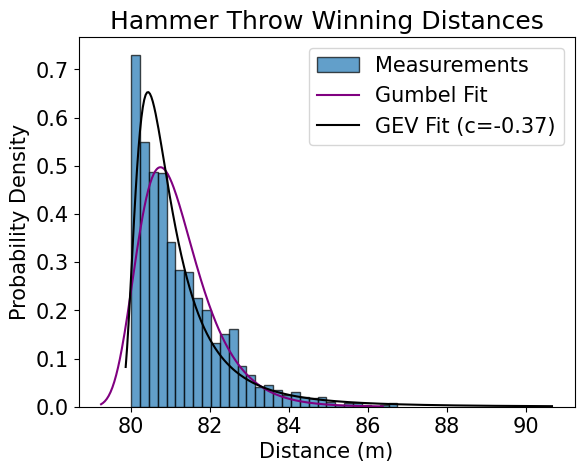

In [ ]:
# Plot the hist of data
plt.hist(ht_data['Distance'],
         bins=30,
         edgecolor='black',
         density=True,
         label='Measurements', alpha=.7
         )


# Fit and plot Gumbel distribution to data
gumbel_fit = fit_gumbel_distribution(ht_data['Distance'])

x_gumbel = np.linspace(*gumbel_fit.interval(0.999), 300)
plt.plot(x_gumbel, gumbel_fit.pdf(x_gumbel), 'purple', label='Gumbel Fit')


# Fit and plot GEV distribution to data
gev_params = genextreme.fit(ht_data['Distance'])
gev_fit = genextreme(*gev_params)

x_gev = np.linspace(*gev_fit.interval(0.99), 300)
plt.plot(x_gev, gev_fit.pdf(x_gev), 'k', label=f'GEV Fit (c={gev_params[0]:.2})')




plt.xlabel('Distance (m)')
plt.ylabel('Probability Density')
plt.title('Hammer Throw Winning Distances')

plt.legend();